In [12]:
import math
import operator
def calculateIdf(df):
    dictIdf={}
    for keys in df:
        dictIdf[keys]=math.log(len(globalDocNames)/(1+df[keys]))
    return dictIdf

def calculateCosineScore(queryVectorTemp,docVectorTemp):
    cosineScore=0
    deno1=0
    deno2=0
    for i in range(len(queryVectorTemp)):
        cosineScore=cosineScore+queryVectorTemp[i]*docVectorTemp[i]
    for nums in queryVectorTemp:
        deno1=deno1+nums*nums
    deno1=math.sqrt(deno1)
    for nums in docVectorTemp:
        deno2=deno2+nums*nums
    deno2=math.sqrt(deno2)
    deno1=deno1*deno2
    
    cosineScore=cosineScore/(deno1+1)
    return cosineScore



def calculateCosine(k,queryVector):
    #print(queryList)
    #dictScoreCosine.clear()
    dictScoreCosine={}
    
    for docs in tempdoclist:
   
        cosineScore=calculateCosineScore(queryVector,dicDocVector[docs])
        dictScoreCosine[docs]=cosineScore
        
    dictScoreCosine=dict( sorted(dictScoreCosine.items(), key=operator.itemgetter(1),reverse=True))
    
    finalDocVecDic.clear()
    for keys in dictScoreCosine:
        if(k<=0):
            finalDocVecDic[keys]=dicDocVector[keys]
        else:
            finalDocVecDic[keys]=dicDocVector[keys]
            if keys in relDoc:
                print("*",keys,": and Score= ",dictScoreCosine[keys])
            else:
                print(keys,": and Score= ",dictScoreCosine[keys])
            k=k-1

#     for vals in queryVector:
#         finalQueryVec.append(vals)
#     print("len=",len(finalQueryVec))
    
def select_ground_truth():
    print("Enter which folder have to be relevant 1:comp.graphics 2:rec.sports.hockey 3:sci.med 4:sci.space 5:talk.politics.misc")
    gd=input()
    if gd=='1':
        for i in range(1001):
            ground_truth.append(i)
    elif gd=='2':
        for i in range(1001,2001):
            ground_truth.append(i)
    elif gd=='3':
        for i in range(2001,3001):
            ground_truth.append(i)
    elif gd=='4':
        for i in range(3001,4001):
            ground_truth.append(i)
    else:
        for i in range(4001,5001):
            ground_truth.append(i)

In [2]:
def findCentroid(queryVec,itr):
    #centiRelVec=[]
    i=1
    tempRelDoc=[]
    for s in range(int(itr),len(relDoc)):
        tempRelDoc.append(relDoc[s])
    print("itr= ",int(itr),"  len=",len(tempRelDoc))   
    for docs in tempRelDoc:
        #print(docs,":-",finalDocVecDic[docs])
        j=0
        for val in finalDocVecDic[docs]:
            if i==1:
                centiRelVec.append(val)
            else:
                centiRelVec[j]+=val
            j+=1
        i+=1
    i=0
    print(len(centiRelVec))
    for val in centiRelVec:
        centiRelVec[i]=val/len(relDoc)

    print(len(centiRelVec))
    
    #################
    
        #centiNRelVec=[]
    i=1
    for docs in nonRelDoc:
        #print(docs,":-",finalDocVecDic[docs])
        j=0
        for val in finalDocVecDic[docs]:
            if i==1:
                centiNRelVec.append(val)
            else:
                centiNRelVec[j]+=val
            j+=1
        i+=1
    i=0
    print(len(centiNRelVec))
    for val in centiNRelVec:
        centiNRelVec[i]=val/len(nonRelDoc)

    print(len(centiNRelVec))
    
    updateQueryVec(queryVec)
    
    

def updateQueryVec(queryVec):
    alpha=1
    beta=0.7
    gamma=0.25
    i=0
    #updatedQueryVec=[]
    for i in range (len(queryVec)):
        updatedScore=alpha*queryVec[i]+(beta*centiRelVec[i]-gamma*centiNRelVec[i])
        if updatedScore<0:
            updatedScore=0
        updatedQueryVec.append(updatedScore)

    print(len(updatedQueryVec))
    calculateCosine(int(k),updatedQueryVec)
    finalQueryVec.clear()
    temp=[]
    for vals in updatedQueryVec:
        finalQueryVec.append(vals)
        temp.append(vals)
    updatedQueryList.append(temp)
    updatedQueryVec.clear()
    centiRelVec.clear()
    centiNRelVec.clear()
    
import matplotlib.pyplot as plt    
def plotPreRecMap(finalDocVecDic,itr):
    pre=[]
    rec=[]
    rel=0
    i=1
    var_map=0
    #finalDocVecDic=dict( sorted(finalDocVecDic.items(), key=operator.itemgetter(1),reverse=True))
    for docs in finalDocVecDic:
        #if docs in relDoc:
        if i==int(k):
            break
        if docs in ground_truth:
            rel+=1
            var_map+=(rel/i)
        pre.append(rel/i)
        rec.append(rel/len(ground_truth))
        i+=1
        
    if rel==0:
        var_map=0
    else:
        var_map=var_map/rel
    MAP.append(var_map)
    temp=[]
    i=0
    for docs in finalDocVecDic:
        temp.append(i)
        i+=1
    plt.plot(rec, pre,label=str(itr+1)+"th iteration")
#     plt.xlabel("Recall")
#     plt.ylabel("Precision")
#     plt.legend()
#     plt.show()

def plot_tsne1():
    import numpy as np
    import pandas as pd
    from sklearn.manifold import TSNE 
    import seaborn as sns
    X=np.array(updatedQueryList)
    model = TSNE(n_components = 2, random_state = 0) 
    label=["Original","1st iteration","2nd iteration","3rd iteration","4th iteration"]
    tsne_data = model.fit_transform(X)
    tsne_data = np.vstack((tsne_data.T, label)).T 
    tsne_df = pd.DataFrame(data = tsne_data, columns =("Dim_1", "Dim_2", "label"))
    sns.FacetGrid(tsne_df, hue ="label", size = 6).map(plt.scatter, 'Dim_1', 'Dim_2').add_legend() 

    plt.show() 

def plot_tsne():
    import numpy as np
    import pandas as pd
    from sklearn.manifold import TSNE
    import seaborn as sns
    import matplotlib.pyplot as plt1 
    label=["Original","1st iteration","2nd iteration","3rd iteration","4th iteration"]
    X=np.array(updatedQueryList)
    model=TSNE(n_components=2,random_state=23,perplexity=40,n_iter=2500)
    tsne_data=model.fit_transform(X)
    label_num=0
    for i in tsne_data:
        plt1.scatter(i[0],i[1],cmap='rainbow')
        plt1.annotate(label[label_num],(i[0],i[1]))
        label_num+=1
    plt1.show()

In [3]:
import glob
import re
import string
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from num2words import num2words
lemmatizer=WordNetLemmatizer()
import pickle
stop_words = set(stopwords.words('english'))
import math        

In [4]:
# import glob
# import re
# import string
# from nltk.stem import WordNetLemmatizer
# from nltk.tokenize import RegexpTokenizer
# from nltk.corpus import stopwords
# from nltk.tokenize import word_tokenize
# from num2words import num2words
# lemmatizer=WordNetLemmatizer()
path="E:/E/IIIT Delhi/IR/Assign 1/20_newsgroups/temp/alt.atheism"
j=1
k=1


dictWords={}
invertedIndex={}
globalDocNames={}
df={}
doclist=[]
direct = [f for f in sorted(glob.glob("E:/E/IIIT Delhi/IR/Assign4/20_newsfolder/*", recursive=True))]
for d in direct:
    files = [f for f in glob.glob(d+"/*", recursive=True)]
    filesRead={}
    i=1
    
    tokenizer = RegexpTokenizer(r'\w+')
    for f in files:
        list1=[]
        list2=[]
        fileRead = open(f, "r")
        input_str=fileRead.read().translate(str.maketrans("","",string.punctuation))
        input_str=tokenizer.tokenize(input_str.lower())
        pattern='[0-9][a-z]|[0-9]'
        

        stop_words = set(stopwords.words('english'))
        
        result = [i for i in input_str if not i in stop_words]
       
        list1=result
        
        for word in list1:
            if word.isdecimal():
                word1=lemmatizer.lemmatize(word)
                
                list2.append(num2words(word1))
            
            else:
                list2.append(lemmatizer.lemmatize(word))

        
       
        filesRead[i]=list(set(list2))
        for words in filesRead[i]:
            if words not in dictWords.keys():
                
                dictWords[words]={}
                dictWords[words][k]=math.log(1+list2.count(words))/len(list2)
                
            else:
                
                dictWords[words][k]=math.log(1+list2.count(words))/len(list2)
                
        
#         invertedIndex[k]={}
#         for words in filesRead[i]:
#             invertedIndex[k][words]=math.log(1+list2.count(words))/len(list2)
            
        tempListTokens=list(set(list2))
        for tokens in tempListTokens:
            if tokens not in df:
                df[tokens]=1
            else:
                df[tokens]=df[tokens]+1
        
        #lengthDic[k]=len(list2)
        globalDocNames[k]=f[41:]
        i=i+1
        doclist.append(k)
        k=k+1
    print(f[41:])
    
    
    print(j)
    j=j+1
    
    
dictIdf=calculateIdf(df)

print(len(dictWords))
print(len(dictIdf))
print(len(globalDocNames))

comp.graphics\40062
1
rec.sport.hockey\55022
2
sci.med\59652
3
sci.space\62709
4
talk.politics.misc\179116
5
83794
83794
5000


In [5]:

for terms in dictWords:
    for docs in dictWords[terms]:
        dictWords[terms][docs]=dictWords[terms][docs]*dictIdf[terms]
        if dictWords[terms][docs]<0:
            dictWords[terms][docs]=0

dicDocVector={}
        
for docs in doclist:

    docVector=[]
    cosineScore=0
    for terms in dictWords:
        scoreDoc=0

        if docs in dictWords[terms]:
            scoreDoc=dictWords[terms][docs]
        
        docVector.append(scoreDoc)
    dicDocVector[docs]=[]
    dicDocVector[docs]=docVector

globalMap=[]

In [ ]:

# pickle_out = open("E:/E/IIIT Delhi/IR/Assign4/dicDocVector.pickle","wb")
# pickle.dump(dicDocVector, pickle_out)

# pickle_out = open("E:/E/IIIT Delhi/IR/Assign4/dictWords.pickle","wb")
# pickle.dump(dictWords, pickle_out)

# pickle_out = open("E:/E/IIIT Delhi/IR/Assign4/dictIdf.pickle","wb")
# pickle.dump(dictIdf, pickle_out)

# pickle_out.close()

In [ ]:

# pickle_in = open("E:/E/IIIT Delhi/IR/Assign4/dicDocVector.pickle","rb")
# dicDocVector = pickle.load(pickle_in)

# pickle_in = open("E:/E/IIIT Delhi/IR/Assign4/dictWords.pickle","rb")
# dictWords = pickle.load(pickle_in)

# pickle_in = open("E:/E/IIIT Delhi/IR/Assign4/dictIdf.pickle","rb")
# dictIdf = pickle.load(pickle_in)

# print("loaded..")
# globalMap=[]

In [13]:
query=input("Enter Query: ")
#query="gnuplot, etc. make it easy to plot real valued functions of 2 variables."
print(query)
query=query.translate(str.maketrans("","",string.punctuation))
query=word_tokenize(query.lower())
result = [i for i in query if not i in stop_words]
#result=query   
queryList=[]  
#result=[word.strip(string.punctuation) for word in result]
for word in result:
    word=lemmatizer.lemmatize(word)
    if word.isdecimal():
        queryList.append(num2words(word))
    else:
        queryList.append(word)

print("Querylist= ",queryList)
k=input("Enter number of docs you wanna retrive")
finalDocVecDic={}

finalQueryVec=[]
for terms in dictWords:

    scoreQuery=0
    scoreQuery=float(math.log(1+queryList.count(terms))/len(queryList))*dictIdf[terms]
    if scoreQuery<0:
        scoreQuery=0
    finalQueryVec.append(scoreQuery)
        
relDoc=[]
nonRelDoc=[]
updatedQueryList=[]
updatedQueryList.append(finalQueryVec)

tempdoclist=[]
for terms in queryList:
    if terms in dictWords:
        for docs in dictWords[terms]:
            tempdoclist.append(docs)

tempdoclist=list(set(tempdoclist))

ground_truth=[]
select_ground_truth()
calculateCosine(int(k),finalQueryVec)

print(len(finalQueryVec))
print(len(finalDocVecDic))
print(len(updatedQueryList))

Enter Query: Frequently asked questions on State-of-the-art visualisation tools
Frequently asked questions on State-of-the-art visualisation tools
Querylist=  ['frequently', 'asked', 'question', 'stateoftheart', 'visualisation', 'tool']
Enter number of docs you wanna retrive100
Enter which folder have to be relevant 1:comp.graphics 2:rec.sports.hockey 3:sci.med 4:sci.space 5:talk.politics.misc
3
801 : and Score=  0.03385373502871528
8 : and Score=  0.0307319697757577
2011 : and Score=  0.0307319697757577
9 : and Score=  0.02595680182625571
2012 : and Score=  0.02595680182625571
972 : and Score=  0.020406683262684522
3496 : and Score=  0.01847421799357747
4427 : and Score=  0.018395621986926486
3148 : and Score=  0.017225149658860902
656 : and Score=  0.017215940576646212
76 : and Score=  0.01700455705943629
995 : and Score=  0.016989750109182446
3159 : and Score=  0.01668497414842737
66 : and Score=  0.01620090990352028
662 : and Score=  0.016074259113240848
2685 : and Score=  0.015997


 Now the relevent docs marked are  [2011, 2012, 2685, 2423, 2425, 2546, 2671, 2795, 2426, 2462, 2321, 2388, 2118, 2371, 2441, 2939, 2036, 2098, 2460, 2842]
length of non rel docs 80 895
itr=  0   len= 20
83794
83794
83794
83794
83794
* 2546 : and Score=  0.1137451392262676
* 2685 : and Score=  0.09567785057663264
* 2462 : and Score=  0.09194506699463534
* 2426 : and Score=  0.08962019268677168
* 2441 : and Score=  0.07875989838975579
* 2423 : and Score=  0.0755917829252136
* 2388 : and Score=  0.07478403064427455
* 2425 : and Score=  0.07217514415782722
8 : and Score=  0.06834253388754295
* 2011 : and Score=  0.06834253388754295
* 2460 : and Score=  0.06590181439225626
* 2671 : and Score=  0.06340432990119985
9 : and Score=  0.05960064697911528
* 2012 : and Score=  0.05960064697911528
* 2321 : and Score=  0.05852233924950689
* 2036 : and Score=  0.05489386419313294
* 2939 : and Score=  0.05413927101172474
2539 : and Score=  0.053185190504343345
* 2371 : and Score=  0.05199239005224239

* 2158 : and Score=  0.1380578328595604
* 2546 : and Score=  0.13237906248445774
* 2518 : and Score=  0.1302703073983981
* 2425 : and Score=  0.11077331535619836
* 2140 : and Score=  0.11059048257599603
* 2922 : and Score=  0.10791312324199703
* 2902 : and Score=  0.10784009887659192
* 2542 : and Score=  0.1048961705396491
* 2525 : and Score=  0.10456207629379856
* 2255 : and Score=  0.10225577225639727
* 2462 : and Score=  0.10131765995013844
* 2426 : and Score=  0.10001231474603205
* 2564 : and Score=  0.096683855568287
* 2560 : and Score=  0.0937379661007127
* 2441 : and Score=  0.08976876564897193
* 2538 : and Score=  0.08961041205682947
* 2423 : and Score=  0.0840268073575078
* 2063 : and Score=  0.08365786199282735
* 2685 : and Score=  0.0806332727762298
* 2539 : and Score=  0.0804275913118536
* 2427 : and Score=  0.08017823893576821
* 2460 : and Score=  0.07955508511027987
* 2405 : and Score=  0.07889721180931988
* 2043 : and Score=  0.07827121566031854
* 2576 : and Score=  0.07

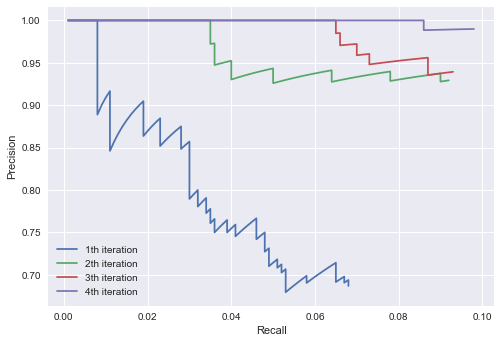

In [14]:
MAP=[]
centiRelVec=[]
centiNRelVec=[]
updatedQueryVec=[]
def markRelevant(queryVec,itr):
#     inputRel=input("Enter relevant doc-id's seperated by commas")
#     relList=inputRel.split(",")
    itr1=itr
    i1=int(k)*(20/100)
    itr=itr*i1
    for docs in finalDocVecDic:
        if i1==0:
            break
        if docs in ground_truth and docs not in relDoc:
            relDoc.append(docs)
            i1-=1
#     for docs in relList:
#         if int(docs) not in list(finalDocVecDic.keys())[:int(k)]:
#             print("Doc Id",docs,"you entered is not in retrived doc")
#         else:
#             relDoc.append(int(docs))

    print("\n Now the relevent docs marked are ",relDoc)
    
    nonRelDoc.clear()
    
    for docs in list(finalDocVecDic.keys())[:int(k)]:
        if docs not in relDoc and docs not in nonRelDoc:
            nonRelDoc.append(docs)
        
    #nonRelDoc=list(set(nonRelDoc))
    print("length of non rel docs",len(nonRelDoc),len(finalDocVecDic))

    findCentroid(queryVec,itr)
    plotPreRecMap(finalDocVecDic,itr1)
    
i=0
iterations=4
for i in range(iterations):
    markRelevant(finalQueryVec,i)
globalMap.append(MAP)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()

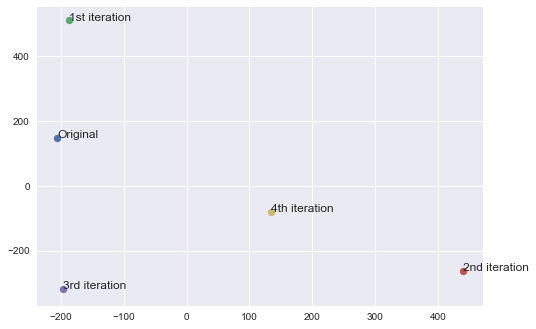

In [15]:
plot_tsne()

In [ ]:
avgMap=[]
for i in range(iterations):
    score=0
    for j in range(len(globalMap)):
        score+=globalMap[j][i]
    avgMap.append(score/len(globalMap))
plt.plot([1,2,3,4],avgMap)
plt.xlabel("Iterations")
plt.ylabel("MAP")
plt.show()